# DATA606 - Capstone Project
## Proposal Title: Property price prediction
### Author Name - Balaji Manoj Jollu
### Prepared for UMBC Data Science Master Degree Capstone by Dr Chaojie (Jay) Wang

dataset : https://www.kaggle.com/code/goyaladi/property-price-ann-predictions/input

In [78]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
file_path = '/content/Makaan_Properties_Buy.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


## Exploring dataset

In [80]:
df.info

<bound method DataFrame.info of                     Property_Name  Property_id Property_type  \
0                    Arkiton Luxe     15446514     Apartment   
1       Keshav Akshar Ocean Pearl     15367414     Apartment   
2                 Vishwa Opulence     14683118     Apartment   
3                   Satyam Sarjan      5476295     Apartment   
4                Navkar Sunflower     15477040     Apartment   
...                           ...          ...           ...   
332091  Rajlaxmi RaajLaxmi Towers     10324765     Apartment   
332092  Rajlaxmi RaajLaxmi Towers     15076701     Apartment   
332093  Rajlaxmi RaajLaxmi Towers     10324762     Apartment   
332094  Rajlaxmi RaajLaxmi Towers     15076700     Apartment   
332095  Rajlaxmi RaajLaxmi Towers     14683740     Apartment   

           Property_status Price_per_unit_area     Posted_On  \
0       Under Construction               4,285     1 day ago   
1       Under Construction               7,000    2 days ago   
2      

In [81]:
df.shape

(332096, 32)

In [82]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_

In [83]:
df.dropna(inplace=True)

In [84]:
print(df.isnull().sum())

Property_Name               0
Property_id                 0
Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Project_URL                 0
builder_id                  0
Builder_name                0
Property_building_status    0
City_id                     0
City_name                   0
No_of_BHK                   0
Locality_ID                 0
Locality_Name               0
Longitude                   0
Latitude                    0
Price                       0
Size                        0
Sub_urban_ID                0
Sub_urban_name              0
description                 0
is_furnished                0
listing_domain_score        0
is_plot                     0
is_RERA_registered          0
is_Apartment                0
is_ready_to_move            0
is_commercial_Listing       0
is_PentaHouse               0
is_studio                   0
Listing_Category            0
dtype: int64


In [85]:
df.shape

(143708, 32)

In [86]:
df.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

In [87]:
print(df.columns.tolist())

['Property_Name', 'Property_id', 'Property_type', 'Property_status', 'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id', 'Builder_name', 'Property_building_status', 'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude', 'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description', 'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing', 'is_PentaHouse', 'is_studio', 'Listing_Category']


In [88]:
columns_to_drop = ['Posted_On','Project_URL','description','Listing_Category','is_commercial_Listing']
df = df.drop(columns=columns_to_drop)

In [89]:
df['listing_domain_score'].value_counts()

4.00000    142873
4.46429       340
4.82143       218
4.28571       163
4.64286        42
5.17857        19
5.00000        14
4.10714        11
7.14286        10
8.39286         8
8.17469         2
8.03835         2
7.71576         1
8.71040         1
8.45764         1
8.21692         1
4.52830         1
5.81818         1
Name: listing_domain_score, dtype: int64

<ipython-input-90-3d95ab146fb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


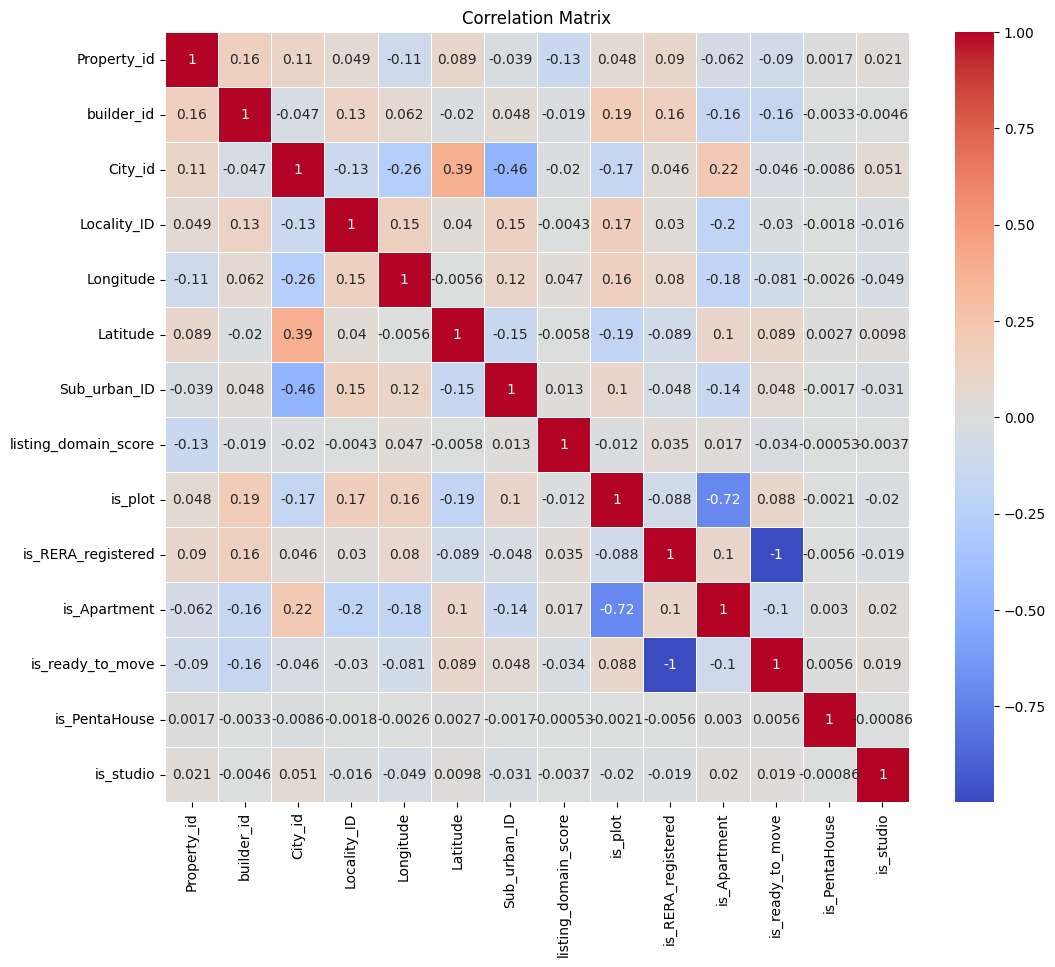

In [90]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

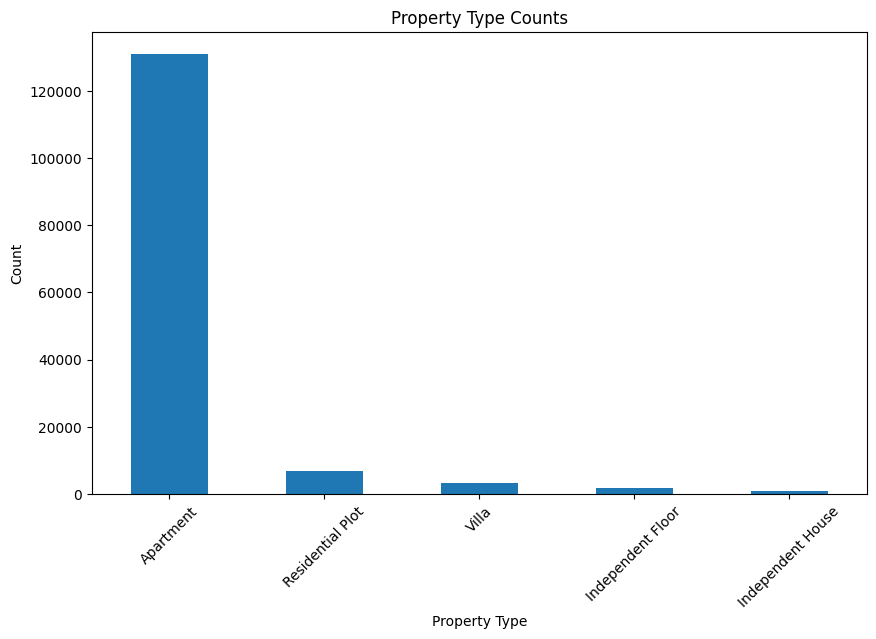

In [91]:
df['Property_type'].value_counts().plot(kind='bar', figsize=(10, 6), rot=45, title='Property Type Counts')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()